In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [71]:
df = pd.read_csv('Student_Clean_data.csv')

In [72]:
df.isnull().sum()

Unnamed: 0              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
sum_click               0
score                   0
is_cheater              0
dtype: int64

In [73]:
df

,Unnamed: 0,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
0,0,M,East Anglian Region,HE Qualification,90-100%,>=55,0,240,N,Pass,934,78.0,0.0
1,1,M,East Anglian Region,HE Qualification,90-100%,>=55,0,240,N,Pass,934,85.0,0.0
2,2,M,East Anglian Region,HE Qualification,90-100%,>=55,0,240,N,Pass,934,80.0,0.0
3,3,M,East Anglian Region,HE Qualification,90-100%,>=55,0,240,N,Pass,934,85.0,0.0
4,4,M,East Anglian Region,HE Qualification,90-100%,>=55,0,240,N,Pass,934,82.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206785,207011,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,60.0,0.0
206786,207012,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,100.0,0.0
206787,207013,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,60.0,0.0
206788,207014,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,100.0,0.0


In [74]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [75]:
df

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
0,M,East Anglian Region,HE Qualification,90-100%,>=55,0,240,N,Pass,934,78.0,0.0
1,M,East Anglian Region,HE Qualification,90-100%,>=55,0,240,N,Pass,934,85.0,0.0
2,M,East Anglian Region,HE Qualification,90-100%,>=55,0,240,N,Pass,934,80.0,0.0
3,M,East Anglian Region,HE Qualification,90-100%,>=55,0,240,N,Pass,934,85.0,0.0
4,M,East Anglian Region,HE Qualification,90-100%,>=55,0,240,N,Pass,934,82.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
206785,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,60.0,0.0
206786,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,100.0,0.0
206787,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,60.0,0.0
206788,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,100.0,0.0


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [77]:
df['is_cheater'] = df['is_cheater'].astype(int)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206790 entries, 0 to 206789
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                206790 non-null  object 
 1   region                206790 non-null  object 
 2   highest_education     206790 non-null  object 
 3   imd_band              206790 non-null  object 
 4   age_band              206790 non-null  object 
 5   num_of_prev_attempts  206790 non-null  int64  
 6   studied_credits       206790 non-null  int64  
 7   disability            206790 non-null  object 
 8   final_result          206790 non-null  object 
 9   sum_click             206790 non-null  int64  
 10  score                 206790 non-null  float64
 11  is_cheater            206790 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(7)
memory usage: 18.1+ MB


In [79]:
# Define features and target
X = df.drop(['is_cheater'], axis=1)
y = df['is_cheater']

In [80]:
X

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score
0,M,East Anglian Region,HE Qualification,90-100%,>=55,0,240,N,Pass,934,78.0
1,M,East Anglian Region,HE Qualification,90-100%,>=55,0,240,N,Pass,934,85.0
2,M,East Anglian Region,HE Qualification,90-100%,>=55,0,240,N,Pass,934,80.0
3,M,East Anglian Region,HE Qualification,90-100%,>=55,0,240,N,Pass,934,85.0
4,M,East Anglian Region,HE Qualification,90-100%,>=55,0,240,N,Pass,934,82.0
...,...,...,...,...,...,...,...,...,...,...,...
206785,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,60.0
206786,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,100.0
206787,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,60.0
206788,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,100.0


In [81]:

# Separate categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [ ]:



# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])



In [ ]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)


In [ ]:

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9960104453793703

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41160
           1       0.63      0.41      0.50       198

    accuracy                           1.00     41358
   macro avg       0.81      0.70      0.75     41358
weighted avg       1.00      1.00      1.00     41358



In [90]:
import joblib

# Save the trained pipeline
joblib.dump(pipeline, "random_forest_cheater_detection.pkl")

print("✅ Model pipeline saved successfully as random_forest_cheater_detection.pkl")


✅ Model pipeline saved successfully as random_forest_cheater_detection.pkl


In [91]:
loaded_model = joblib.load("random_forest_cheater_detection.pkl")

# Use it for predictions
y_pred_loaded = loaded_model.predict(X_test)

print("Loaded model accuracy:", accuracy_score(y_test, y_pred_loaded))


Loaded model accuracy: 0.9960104453793703


In [97]:
df.iloc[0]

gender                                    M
region                  East Anglian Region
highest_education          HE Qualification
imd_band                            90-100%
age_band                               >=55
num_of_prev_attempts                      0
studied_credits                         240
disability                                N
final_result                           Pass
sum_click                               934
score                                  78.0
is_cheater                                0
Name: 0, dtype: object

In [92]:
new_data = pd.DataFrame([{
    'gender': 'M',
    'imd_band': '30-40%',
    'age_band': '0-35',
    'num_of_prev_attempts': 1,
    'studied_credits': 60,
    'disability': 'N',
    'sum_click': 2000,
    'score': 85.0
}])


In [ ]:
new_data

,gender,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,sum_click,score
0,M,30-40%,0-35,1,60,N,2000,85.0


In [36]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# **Applying Random Forest Simply**

In [37]:
df = pd.read_csv('Student_Cheater_data.csv')

In [38]:
df.head()

,Unnamed: 0,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
0,0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,78.0,0
1,1,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,85.0,0
2,2,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,80.0,0
3,3,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,85.0,0
4,4,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,82.0,0


### Replacing the Null Values

In [39]:
df = df[~df['is_cheater'].isnull()]

In [40]:
df

,Unnamed: 0,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
0,0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,78.0,0
1,1,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,85.0,0
2,2,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,80.0,0
3,3,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,85.0,0
4,4,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,82.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206785,207011,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,60.0,0
206786,207012,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,100.0,0
206787,207013,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,60.0,0
206788,207014,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,100.0,0


<AxesSubplot:>

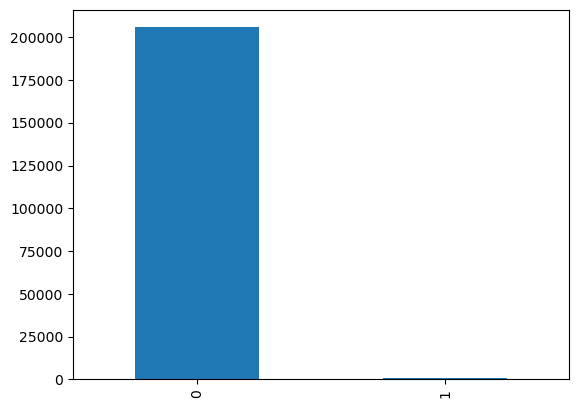

In [41]:
df['is_cheater'].value_counts().plot(kind='bar')

### Changing type of is_cheater Column

In [42]:
df['is_cheater'] = df['is_cheater'].astype('int')

In [43]:
df.sample()

,Unnamed: 0,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
203417,203642,F,East Anglian Region,Lower Than A Level,40-50%,0-35,0,30,N,Distinction,607,80.0,0


#### Removing Unnamed: 0 Column

In [44]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [45]:
df.sample()

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
134568,F,North Region,A Level or Equivalent,10-20,0-35,0,145,N,Distinction,1410,95.0,0


In [13]:
# df.to_csv('Student_Cheater_data.csv',index=False)

In [46]:
df = pd.read_csv('Student_Cheater_data.csv')

In [47]:
df.head()

,Unnamed: 0,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
0,0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,78.0,0
1,1,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,85.0,0
2,2,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,80.0,0
3,3,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,85.0,0
4,4,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,82.0,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206790 entries, 0 to 206789
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            206790 non-null  int64  
 1   gender                206790 non-null  object 
 2   region                206790 non-null  object 
 3   highest_education     206790 non-null  object 
 4   imd_band              206790 non-null  object 
 5   age_band              206790 non-null  object 
 6   num_of_prev_attempts  206790 non-null  int64  
 7   studied_credits       206790 non-null  int64  
 8   disability            206790 non-null  object 
 9   final_result          206790 non-null  object 
 10  sum_click             206790 non-null  int64  
 11  score                 206790 non-null  float64
 12  is_cheater            206790 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 20.5+ MB


#### Correcting inconsistant values from '55<=' to  '>=55'

In [49]:
df['age_band'] = df['age_band'].apply(lambda x: '>=55' if x =='55<=' else x)

In [50]:
df.sample()

,Unnamed: 0,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
170780,170987,M,South Region,A Level or Equivalent,40-50%,0-35,0,90,N,Pass,1815,75.0,0


In [51]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [52]:
df.sample()

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
172792,M,North Region,A Level or Equivalent,50-60%,0-35,0,60,N,Pass,3333,83.0,0


In [53]:
df.drop('highest_education',axis=1,inplace=True)

### Identifying Categorical and Numerical Values

### 1-Categorical
**gender**

**region**

**imd_band**

**age_band**

**disability**

**final_result**

**is_cheater**

### 2-Numerical 
**num_of_prev_attempts**

**studied_credits**

**sum_clicks**

**score**

In [54]:
df.sample()

,gender,region,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
67265,F,South West Region,30-40%,0-35,0,90,Y,Withdrawn,1680,73.0,0


In [ ]:
# Mapping Gender Column
# df.replace({'gender':{'F':0,'M':1}},inplace=True)# Replacing Male with 1 and Female with 0
# df.head(2)

,gender,region,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
0,1,East Anglian Region,90-100%,>=55,0,240,N,Pass,934,78.0,0
1,1,East Anglian Region,90-100%,>=55,0,240,N,Pass,934,85.0,0


## Encoding (categorical values) and Scalling (Numerical values)

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

In [56]:
categorical_cols = ['gender','region','imd_band','age_band','disability','final_result']
numerical_cols = ['num_of_prev_attempts','studied_credits','sum_click','score']

In [57]:
lb_encoder = LabelEncoder()
oh_encoder = OneHotEncoder()
ord_encoder = OrdinalEncoder()
scaler = StandardScaler()

In [58]:
new_df =pd.DataFrame()

In [59]:
# label encoding on Categorical Column
le = LabelEncoder()

for col in categorical_cols:
    new_df[col] = le.fit_transform(df[col])

new_df

,gender,region,imd_band,age_band,disability,final_result
0,1,0,9,2,0,2
1,1,0,9,2,0,2
2,1,0,9,2,0,2
3,1,0,9,2,0,2
4,1,0,9,2,0,2
...,...,...,...,...,...,...
206785,0,12,5,1,0,0
206786,0,12,5,1,0,0
206787,0,12,5,1,0,0
206788,0,12,5,1,0,0


In [60]:
new_df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [61]:
new_df

,gender,region,imd_band,age_band,disability,final_result,num_of_prev_attempts,studied_credits,sum_click,score
0,1,0,9,2,0,2,-0.339566,4.261986,-0.591214,0.135841
1,1,0,9,2,0,2,-0.339566,4.261986,-0.591214,0.502710
2,1,0,9,2,0,2,-0.339566,4.261986,-0.591214,0.240661
3,1,0,9,2,0,2,-0.339566,4.261986,-0.591214,0.502710
4,1,0,9,2,0,2,-0.339566,4.261986,-0.591214,0.345480
...,...,...,...,...,...,...,...,...,...,...
206785,0,12,5,1,0,0,-0.339566,-1.267309,-0.718063,-0.807538
206786,0,12,5,1,0,0,-0.339566,-1.267309,-0.718063,1.288859
206787,0,12,5,1,0,0,-0.339566,-1.267309,-0.718063,-0.807538
206788,0,12,5,1,0,0,-0.339566,-1.267309,-0.718063,1.288859


In [62]:
X = new_df
y = df['is_cheater']

In [63]:
X.head()

,gender,region,imd_band,age_band,disability,final_result,num_of_prev_attempts,studied_credits,sum_click,score
0,1,0,9,2,0,2,-0.339566,4.261986,-0.591214,0.135841
1,1,0,9,2,0,2,-0.339566,4.261986,-0.591214,0.502710
2,1,0,9,2,0,2,-0.339566,4.261986,-0.591214,0.240661
3,1,0,9,2,0,2,-0.339566,4.261986,-0.591214,0.502710
4,1,0,9,2,0,2,-0.339566,4.261986,-0.591214,0.345480


In [64]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_cheater, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42,stratify=y)

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

In [69]:
pd.DataFrame(y_pred).value_counts()

0    41220
1      138
dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [72]:
print('*'*70)
print("Accuracy:", accuracy_score(y_test, y_pred))
print('*'*70)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print('*'*70)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print('*'*70)


**********************************************************************
Accuracy: 0.9956719377145897
**********************************************************************

Confusion Matrix:
 [[41096    55]
 [  124    83]]
**********************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41151
           1       0.60      0.40      0.48       207

    accuracy                           1.00     41358
   macro avg       0.80      0.70      0.74     41358
weighted avg       1.00      1.00      1.00     41358

**********************************************************************


In [73]:
df.sample(5)

,gender,region,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
198275,F,South West Region,30-40%,35-55,1,60,N,Pass,1175,55.0,0
85859,M,Wales,50-60%,35-55,0,60,N,Pass,3079,86.0,0
119219,F,North Region,80-90%,35-55,1,60,N,Pass,780,46.0,0
188741,M,North Western Region,0-10%,0-35,0,60,N,Withdrawn,4840,94.0,0
36115,F,East Anglian Region,10-20,0-35,0,60,N,Distinction,205,67.0,0


In [74]:
df.corr(numeric_only=True)

TypeError: corr() got an unexpected keyword argument 'numeric_only'

In [30]:
df.corr(method='spearman',numeric_only=True)  

,num_of_prev_attempts,studied_credits,sum_click,score,is_cheater
num_of_prev_attempts,1.000000,0.186417,-0.051876,-0.081382,0.027262
studied_credits,0.186417,1.000000,0.101430,-0.057908,0.018834
sum_click,-0.051876,0.101430,1.000000,0.177467,0.005352
score,-0.081382,-0.057908,0.177467,1.000000,-0.007023
is_cheater,0.027262,0.018834,0.005352,-0.007023,1.000000


### Saving Model For Further use

In [ ]:

import pickle

In [76]:
with open('cheater_random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)


In [77]:
# Exporting Scaling
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [78]:
# Exporting Scaling
with open('label_encoder.pkl','wb') as file:
    pickle.dump(le,file)

In [79]:
with open('cheater_random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)



In [80]:
# Use it for prediction
pd.DataFrame(loaded_model.predict(X_test)).value_counts()

0    41220
1      138
dtype: int64

In [93]:
X_test.shape,X_test.iloc[0].values.reshape(1,-1).shape

((41358, 10), (1, 10))

In [96]:
# pd.DataFrame(loaded_model.predict(X_test.iloc[0].reshape(1,-1)))

In [81]:
X_test.iloc[34]

gender                  1.000000
region                  8.000000
imd_band                3.000000
age_band                0.000000
disability              0.000000
final_result            2.000000
num_of_prev_attempts   -0.339566
studied_credits        -0.477410
sum_click              -0.586826
score                   1.288859
Name: 31239, dtype: float64

In [142]:
loaded_model.predict([X_test.iloc[16209]])

c:\Users\PMYLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [126]:
X_test.iloc[0]

gender                   1.000000
region                  12.000000
imd_band                 3.000000
age_band                 0.000000
disability               0.000000
final_result             2.000000
num_of_prev_attempts    -0.339566
studied_credits         -0.477410
sum_click               -0.165989
score                    0.240661
Name: 67060, dtype: float64

In [143]:
df.sample()

,gender,region,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
187472,1,Wales,70-80%,0-35,0,120,N,Fail,1023,37.0,0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle

In [3]:
df1 = pd.read_csv('Student_Cheater_data.csv')

In [4]:
df1.sample()

,Unnamed: 0,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
57218,57290,M,South East Region,A Level or Equivalent,30-40%,0-35,0,120,N,Fail,4612,90.0,0


In [5]:
df1.drop(['Unnamed: 0','highest_education'],axis=1,inplace=True)

In [6]:
df1.sample()

,gender,region,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
189934,M,North Region,20-30%,35-55,0,120,N,Pass,970,74.0,0


In [7]:
x = df1.drop('is_cheater',axis=1)
y = df1['is_cheater']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42,stratify=y)

In [8]:
df1.sample()

,gender,region,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
74898,M,East Midlands Region,70-80%,0-35,0,90,N,Withdrawn,792,87.0,0


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Indices of categorical and numeric columns
categorical_cols_idx = [0,1,2,3,6,7]  # replace with your actual indices
numeric_cols_idx = [4,5,8,9]  # replace with your numeric column indices

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', OrdinalEncoder(), categorical_cols_idx),
    ('num', StandardScaler(), numeric_cols_idx)
])

# Pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit pipeline
pipe.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  [0, 1, 2, 3, 6, 7]),
                                                 ('num', StandardScaler(),
                                                  [4, 5, 8, 9])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [10]:
x_test[:2]

,gender,region,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score
67060,M,Yorkshire Region,30-40%,0-35,0,60,N,Pass,2000,80.0
159396,M,East Midlands Region,20-30%,0-35,0,60,N,Pass,2113,84.0


In [11]:
y_pred = pipe.predict(x_test)

In [12]:
x_test.iloc[1035]

gender                         M
region                  Scotland
imd_band                  70-80%
age_band                   35-55
num_of_prev_attempts           0
studied_credits               60
disability                     N
final_result                Fail
sum_click                   4137
score                       65.0
Name: 72628, dtype: object

In [13]:
y_pred[6]

1

In [14]:
a = y_pred.tolist()

In [15]:
cheater_preds = [(ind,item) for ind,item in enumerate(a) if item ==1]

In [16]:
cheater_preds[:10]

[(6, 1),
 (224, 1),
 (909, 1),
 (1035, 1),
 (1189, 1),
 (1221, 1),
 (1261, 1),
 (1266, 1),
 (1305, 1),
 (1361, 1)]

In [17]:
count=0
for i in y_pred:
    if i ==1:
        count+=1
print('0 occur',len(y_pred)-count," \n1 Occur",count)

0 occur 41217  
1 Occur 141


In [18]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9956961168335026
[[41095    56]
 [  122    85]]


### **Exporting the model**

In [19]:
import pickle

In [20]:
pickle.dump(df1,open('df.pkl','wb'))

In [21]:
# Exporting Pipe as Preprocessing and Model

pickle.dump(pipe,open('pipe.pkl','wb'))